In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load and Read (Remember to Change These)
mouse_drug = "Resources/mouse_drug_data.csv"
clinical_trial = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug)
clinical_trial_df = pd.read_csv(clinical_trial)

# Combine the data into a single dataset
mouse_drug_trial_df = pd.merge(mouse_drug_df,clinical_trial_df, how="left", on= ["Mouse ID", "Mouse ID"])

# Display the data table for preview

mouse_drug_trial_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
# Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = mouse_drug_trial_df.groupby(["Drug","Timepoint"]).mean()
tumor_mean.reset_index(level = None, inplace = True)

# Convert to DataFrame

tumor_treatement_mean_df = pd.DataFrame(tumor_mean)

# Display the data table for preview

tumor_treatement_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [3]:
# Tumor Volumes Grouped by Drug and Timepoint

tumor_sem = mouse_drug_trial_df.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame

tumor_sem_df = pd.DataFrame(tumor_sem)

# Display the data table for preview

tumor_sem_df.head().reset_index()


,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [4]:
# Resetting the Data Frames
tumor_mean = tumor_mean.reset_index()
tumor_mean_pivot = tumor_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_sem = tumor_sem.reset_index()
tumor_sem_pivot = tumor_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
                                                                        
# Display the data table for preview
tumor_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


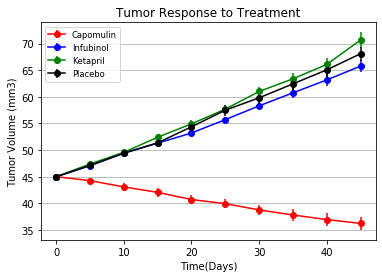

In [7]:
# Generate the Plot
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Capomulin"], yerr=tumor_sem_pivot["Capomulin"], color="r", marker="o")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Infubinol"], yerr=tumor_sem_pivot["Infubinol"], color="b", marker="o")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Ketapril"], yerr=tumor_sem_pivot["Ketapril"], color="g", marker="o")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Placebo"], yerr=tumor_sem_pivot["Placebo"], color="k", marker="o")
             
# Save the Figure
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time(Days)")           
plt.title("Tumor Response to Treatment")
plt.grid(axis='y')           
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small")             

# Save the Figure
plt.savefig("Fig1.png")

# Show the figure
plt.show()    

In [8]:
# Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites_mean = mouse_drug_trial_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
met_sites_mean = pd.DataFrame(met_sites_mean)

# Display the data table for preview
met_sites_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Met. Sites Grouped by Drug and Timepoint 
met_sites_sem = mouse_drug_trial_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
met_sites_sem = pd.DataFrame(met_sites_sem)

# Display the data table for preview
met_sites_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Updating the Data Frames
met_sites_mean = met_sites_mean.reset_index()
met_sites_pivot_mean = met_sites_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

met_sites_sem = met_sites_sem.reset_index()
met_sites_pivot_sem = met_sites_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Display the data table for preview
met_sites_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


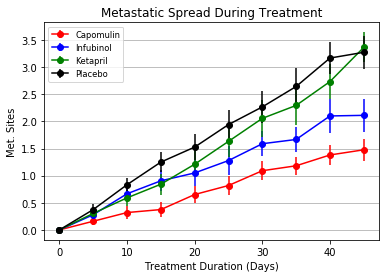

In [11]:
# Generate the Plot
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Capomulin"], yerr=met_sites_pivot_sem["Capomulin"], color="r", marker="o")
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Infubinol"], yerr=met_sites_pivot_sem["Infubinol"], color="b", marker="o")
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Ketapril"], yerr=met_sites_pivot_sem["Ketapril"], color="g", marker="o")
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Placebo"], yerr=met_sites_pivot_sem["Placebo"], color="k", marker="o")

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small")

# Save the Figure
plt.savefig("Fig2.png")

# Show the Figure
plt.show()

In [20]:
# Count of Mice Grouped by Drug and Timepoint 
survival_numbers = mouse_drug_trial_df.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
survival_numbers = pd.DataFrame({"Mouse Count": survival_numbers})

# Display the data table for preview
survival_numbers.head().reset_index()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Resetting the Data Frames
survival_numbers = survival_numbers.reset_index()
survival_numbers_pivot = survival_numbers.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Display the data table for preview
survival_numbers_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


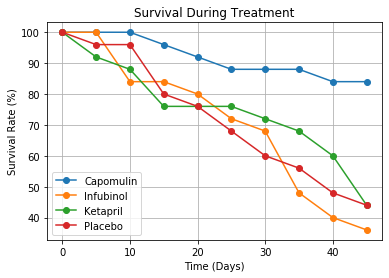

In [18]:
# Generate the Plot
plt.plot(100 * survival_numbers_pivot["Capomulin"] / 25, "o" , linestyle="solid")
plt.plot(100 * survival_numbers_pivot["Infubinol"] / 25, "o", linestyle="solid")
plt.plot(100 * survival_numbers_pivot["Ketapril"] / 25, "o", linestyle="solid")
plt.plot(100 * survival_numbers_pivot["Placebo"] / 25 , "o", linestyle="solid")
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best")

# Save the Figure
plt.savefig("Fig3.png")

# Show the Figure
plt.show()

In [21]:
# Percent changes for each drug
tumor_change =  100 * (tumor_mean_pivot.iloc[-1] - tumor_mean_pivot.iloc[0]) / tumor_mean_pivot.iloc[0]
tumor_change_sem =  100 * (tumor_sem_pivot.iloc[-1] - tumor_sem_pivot.iloc[0]) / tumor_sem_pivot.iloc[0]

# Display the data for preview
tumor_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

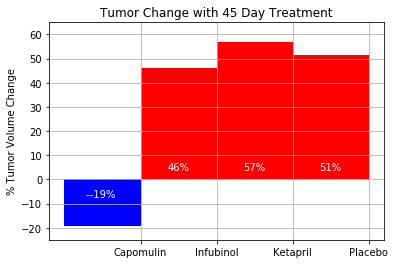

In [23]:
#  Percent Changes 
percent_changes = (tumor_change["Capomulin"], 
                   tumor_change["Infubinol"], 
                   tumor_change["Ketapril"], 
                   tumor_change["Placebo"])

# Pass vs Fail drugs
fig, ax = plt.subplots()
ind = np.arange(len(percent_changes))  
width = 1
rectsPass = ax.bar(ind[0], percent_changes[0], width, color='blue')
rectsFail = ax.bar(ind[1:], percent_changes[1:], width, color='red')

# Add labels
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change with 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-25,65])
ax.grid(True)

# Label Percentage of Drug Change
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Run function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("Fig4.png")

# Show the Figure
fig.show()